In [1]:
from sqlalchemy import create_engine
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# Create engine: engine
engine = create_engine('sqlite:///programming.sqlite')

In [3]:
# What are the tables in the database?

# Save the table names to a list: table_names
table_names  = engine.table_names()

# Print the table names to the shell
print(table_names)

# See the data model here: http://chinookdatabase.codeplex.com/wikipage?title=Chinook_Schema&referringTitle=Home

['Grade']


In [4]:
### The power of SQL lies in relationships between tables: INNER JOIN

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("select * from Grade",engine)

# drop the unnecessary column
df = df.drop('index', 1)

# print the number of unique students
print(len(df['Aluno_ID'].unique()))

# Print head of DataFrame
df.head(5)

766


,Aluno_ID,Período,Disciplina,Situaçăo,Média Final,Unidade I,Unidade II,Unidade III
0,0,2014.1,IMD0012.0 - INTRODUÇĂO ŔS TÉCNICAS DE PROGRAMAÇĂO,APROVADO,7.0,4.9,9.0,7.0
1,1,2014.1,IMD0012.0 - INTRODUÇĂO ŔS TÉCNICAS DE PROGRAMAÇĂO,APROVADO,7.3,8.0,7.0,7.0
2,2,2014.1,IMD0012.0 - INTRODUÇĂO ŔS TÉCNICAS DE PROGRAMAÇĂO,APROVADO,9.3,9.5,8.3,10.0
3,3,2014.1,IMD0012.0 - INTRODUÇĂO ŔS TÉCNICAS DE PROGRAMAÇĂO,APROVADO,7.3,6.5,7.0,8.3
4,4,2014.1,IMD0012.0 - INTRODUÇĂO ŔS TÉCNICAS DE PROGRAMAÇĂO,APROVADO,7.5,5.5,8.0,9.0


## Limpeza dos dados

In [5]:
print(df.isnull().sum())
print(df.shape)

Aluno_ID         0
Período          0
Disciplina       0
Situaçăo         0
Média Final    513
Unidade I      383
Unidade II     498
Unidade III    510
dtype: int64
(3476, 8)


In [6]:
df1 = df.dropna()
print(df1.isnull().sum())
print(df1.shape)

Aluno_ID       0
Período        0
Disciplina     0
Situaçăo       0
Média Final    0
Unidade I      0
Unidade II     0
Unidade III    0
dtype: int64
(2963, 8)


## Escolhendo disciplina com mais reprovações <br>
A disciplina 'IMD0012.1 - PRÁTICAS DE TÉCNICAS DE PROGRAMAÇĂO' foi a que teve a maior quantidade de reprovações

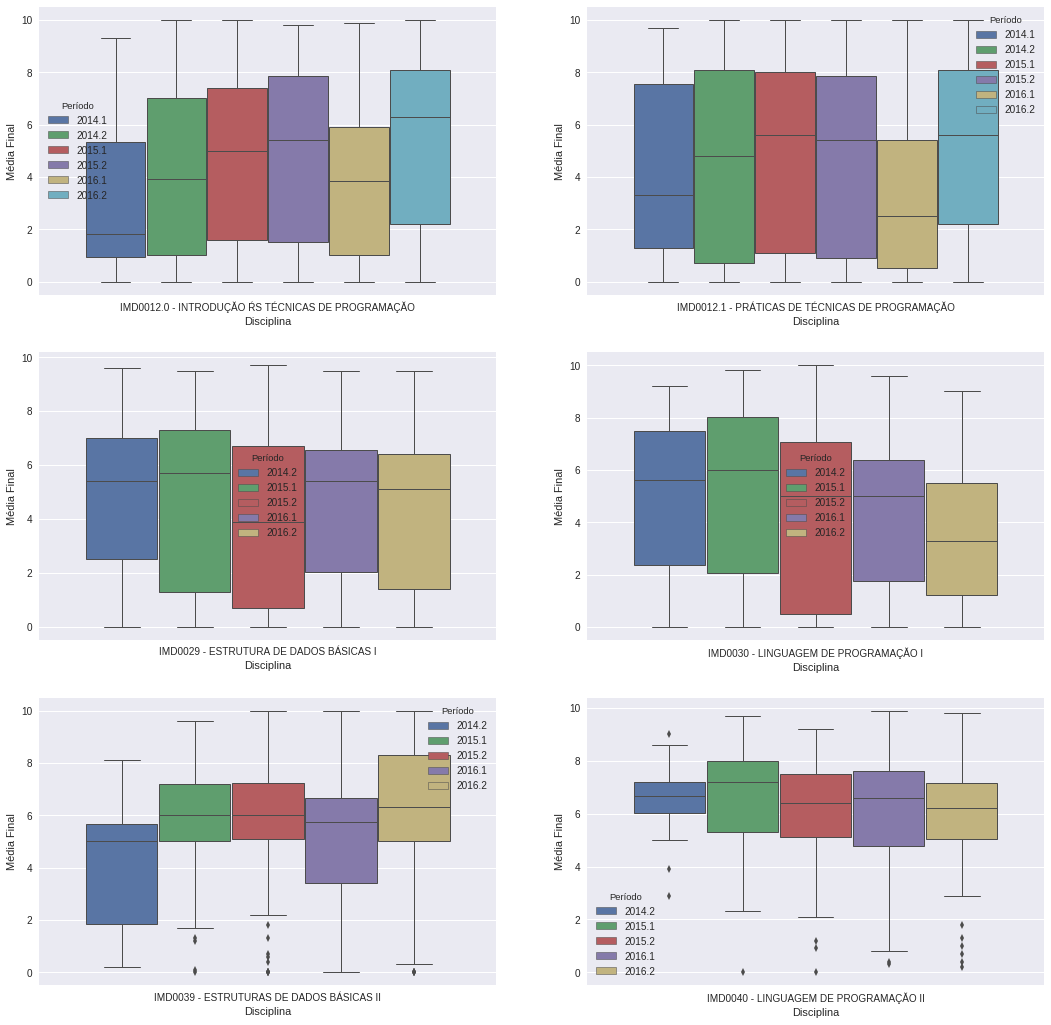

In [17]:
listaDisct = df1["Disciplina"].unique()
fig, axarr  = plt.subplots(3, 2,figsize=(18,18))
sns.boxplot(x="Disciplina",y="Média Final", hue="Período", linewidth=1, ax=axarr[0,0], data=df1[df1["Disciplina"] == listaDisct[0]])
sns.boxplot(x="Disciplina",y="Média Final", hue="Período", linewidth=1, ax=axarr[0,1], data=df1[df1["Disciplina"] == listaDisct[1]])
sns.boxplot(x="Disciplina",y="Média Final", hue="Período", linewidth=1, ax=axarr[1,0], data=df1[df1["Disciplina"] == listaDisct[2]])
sns.boxplot(x="Disciplina",y="Média Final", hue="Período", linewidth=1, ax=axarr[1,1], data=df1[df1["Disciplina"] == listaDisct[3]])
sns.boxplot(x="Disciplina",y="Média Final", hue="Período", linewidth=1, ax=axarr[2,0], data=df1[df1["Disciplina"] == listaDisct[4]])
sns.boxplot(x="Disciplina",y="Média Final", hue="Período", linewidth=1, ax=axarr[2,1], data=df1[df1["Disciplina"] == listaDisct[5]])
plt.show()

In [8]:
#df1["Situaçăo"].unique()
display(df1[df1["Disciplina"] == "IMD0012.1 - PRÁTICAS DE TÉCNICAS DE PROGRAMAÇĂO"]["Situaçăo"].value_counts())
df2 = df1[df1["Disciplina"] == "IMD0012.1 - PRÁTICAS DE TÉCNICAS DE PROGRAMAÇĂO"]

APROVADO                            227
REPROVADO POR MÉDIA E POR FALTAS    156
APROVADO POR NOTA                   125
CANCELADO                           121
REPROVADO                            95
REPROVADO POR NOTA                    3
REPROVADO POR FALTAS                  2
REPROVADO POR NOTA E FALTA            1
Name: Situaçăo, dtype: int64

## Análise das notas por período<br>


**No primeiro semestre tiveram poucos alunos nessa e nas outras disciplinas. Em 2015.1 teve uma queda na quantidade de alunos mas nos outros semestres teve um valor médio de 150 alunos.**

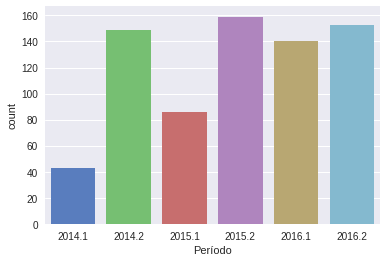

In [9]:
#Quantidade de alunos por período
sns.countplot(x="Período", data=df2, palette="muted");
plt.show()

**No Período de 2016.1 teve uma queda nas notas dos alunos. Em todas as unidades 75% dos alunos tiraram uma nota abaixo de 7.0 <br>
A média das notas dos alunos foi a mais baixa dos 6 semestres e tendo também o menor desvio padrão, logo as notas estão bem próximas da média.
**

In [10]:
notas = df2[["Unidade I", "Unidade II ", "Unidade III", "Média Final", "Período"]]
print("Unidade I")
display(notas.groupby("Período")["Unidade I"].describe())
print("Unidade II")
display(notas.groupby("Período")["Unidade II "].describe())
print("Unidade III")
display(notas.groupby("Período")["Unidade III"].describe())
print("Média Final")
display(notas.groupby("Período")["Média Final"].describe())

Unidade I


,count,mean,std,min,25%,50%,75%,max
Período,,,,,,,,
2014.1,43.0,6.260465,3.879257,0.0,3.000,7.3,9.9,10.0
2014.2,149.0,4.970470,3.643441,0.0,1.000,6.0,8.0,10.0
2015.1,86.0,5.359302,3.446955,0.0,2.125,6.0,8.0,10.0
2015.2,159.0,5.745283,3.632809,0.0,2.050,6.6,9.2,10.0
2016.1,140.0,4.207857,3.004459,0.0,1.500,4.5,6.5,10.0
2016.2,153.0,6.185621,2.992895,0.0,4.500,6.5,9.0,10.0


Unidade II


,count,mean,std,min,25%,50%,75%,max
Período,,,,,,,,
2014.1,43.0,2.751163,3.329906,0.0,0.0,1.8,4.75,10.0
2014.2,149.0,3.880537,3.862076,0.0,0.0,3.0,8.00,10.0
2015.1,86.0,4.436047,3.726090,0.0,0.0,4.5,8.00,10.0
2015.2,159.0,3.606289,3.710551,0.0,0.0,2.7,7.00,10.0
2016.1,140.0,2.371429,2.842845,0.0,0.0,1.0,4.50,10.0
2016.2,153.0,3.792810,3.583131,0.0,0.0,3.0,7.00,10.0


Unidade III


,count,mean,std,min,25%,50%,75%,max
Período,,,,,,,,
2014.1,43.0,2.930233,4.154890,0.0,0.0,0.0,6.8,10.0
2014.2,149.0,4.465101,4.221309,0.0,0.0,4.4,9.0,10.0
2015.1,86.0,4.750000,4.259073,0.0,0.0,6.0,9.0,10.0
2015.2,159.0,4.376101,4.143937,0.0,0.0,4.5,8.2,10.0
2016.1,140.0,2.770714,3.385549,0.0,0.0,0.0,6.4,10.0
2016.2,153.0,4.879085,4.290606,0.0,0.0,6.4,8.8,10.0


Média Final


,count,mean,std,min,25%,50%,75%,max
Período,,,,,,,,
2014.1,43.0,4.127907,3.354125,0.0,1.300,3.3,7.550,9.7
2014.2,149.0,4.472483,3.635465,0.0,0.700,4.8,8.100,10.0
2015.1,86.0,4.880233,3.491901,0.0,1.075,5.6,8.000,10.0
2015.2,159.0,4.699371,3.516642,0.0,0.900,5.4,7.850,10.0
2016.1,140.0,3.207143,2.748515,0.0,0.500,2.5,5.425,10.0
2016.2,153.0,5.053595,3.158198,0.0,2.200,5.6,8.100,10.0


**Analisando as 3 unidades de todos os períodos juntos foi notado que na Unidade I os alunos tem as melhores notas.<br> 
Na Unidade II os alunos tem as piores notas, talvez por terem tido boas notas na primeiras eles tenham relaxado na segunda ou nesta unidade ser um assunto mais difícil, como ponteiros. <br>
A Unidade III tem notas melhores que as segunda, geralmente nessa terceira unidade a avaliação é um projeto então as notas tendem a dar uma melhorada. **

Todos os períodos


,Unidade I,Unidade II,Unidade III,Média Final
count,730.000000,730.000000,730.000000,730.000000
mean,5.369452,3.511918,4.150685,4.428767
std,3.450451,3.594262,4.136618,3.371611
min,0.000000,0.000000,0.000000,0.000000
25%,2.500000,0.000000,0.000000,1.000000
50%,5.900000,2.500000,3.950000,4.800000
75%,8.500000,6.650000,8.075000,7.575000
max,10.000000,10.000000,10.000000,10.000000


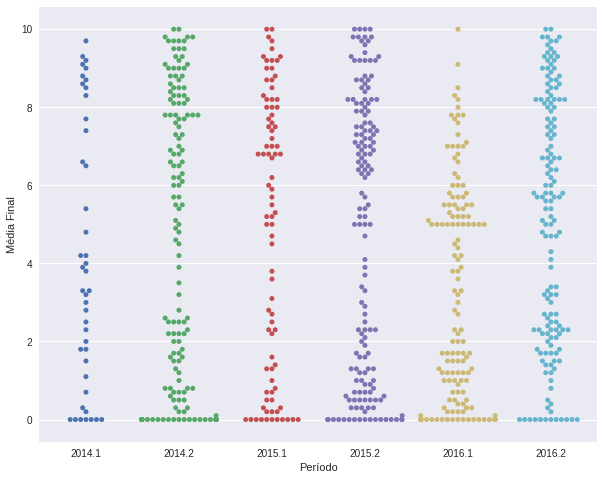

In [11]:
print("Todos os períodos")
display(df2[["Unidade I", "Unidade II ", "Unidade III", "Média Final"]].describe())
fig, ax = plt.subplots(figsize=(10,8))
sns.swarmplot(x="Período",y="Média Final", data=df2)
plt.show()

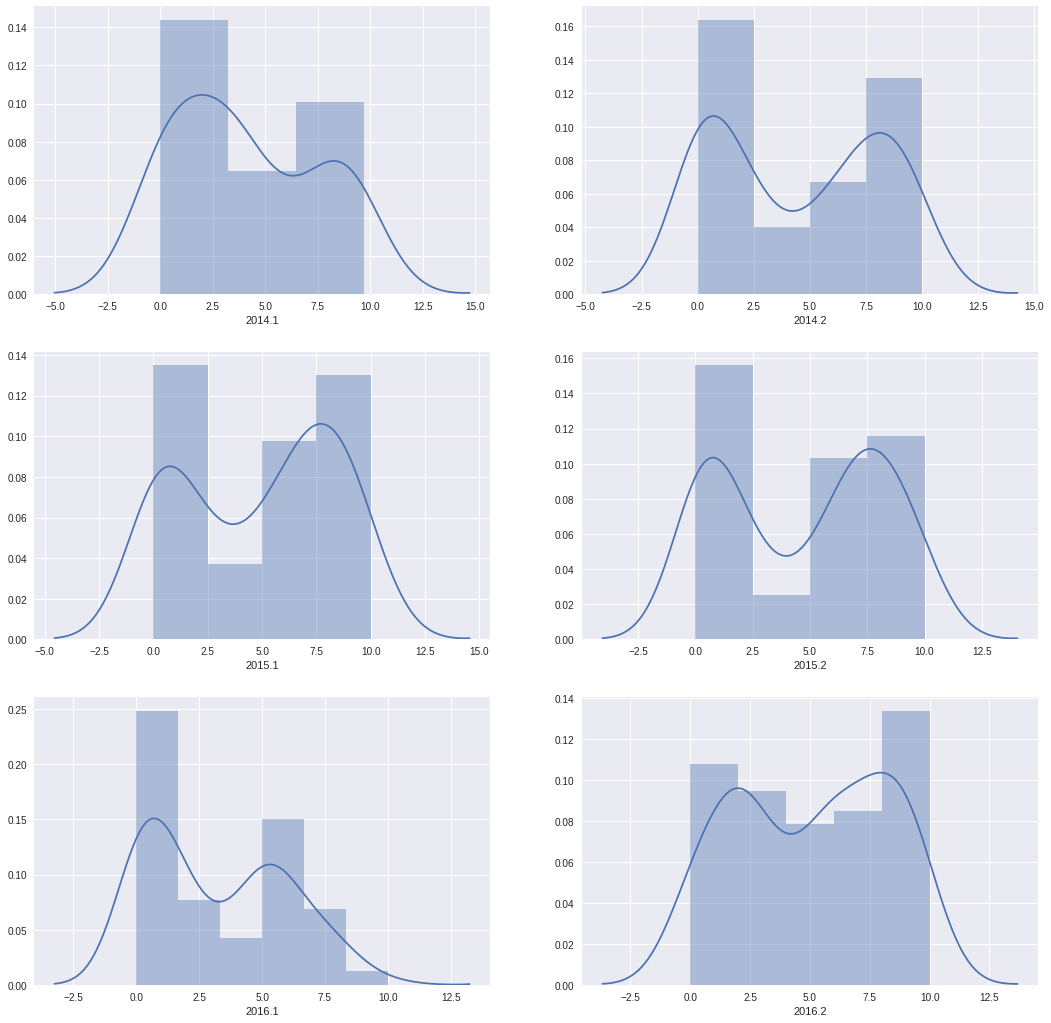

In [12]:
fig, axarr = plt.subplots(3, 2,figsize=(18,18))
sns.distplot(df2[df2["Período"] == 2014.1]["Média Final"], rug=False, ax = axarr[0,0], axlabel="2014.1");
sns.distplot(df2[df2["Período"] == 2014.2]["Média Final"], rug=False, ax = axarr[0,1], axlabel="2014.2");
sns.distplot(df2[df2["Período"] == 2015.1]["Média Final"], rug=False, ax = axarr[1,0], axlabel="2015.1");
sns.distplot(df2[df2["Período"] == 2015.2]["Média Final"], rug=False, ax = axarr[1,1], axlabel="2015.2");
sns.distplot(df2[df2["Período"] == 2016.1]["Média Final"], rug=False, ax = axarr[2,0], axlabel="2016.1");
sns.distplot(df2[df2["Período"] == 2016.2]["Média Final"], rug=False, ax = axarr[2,1], axlabel="2016.2");

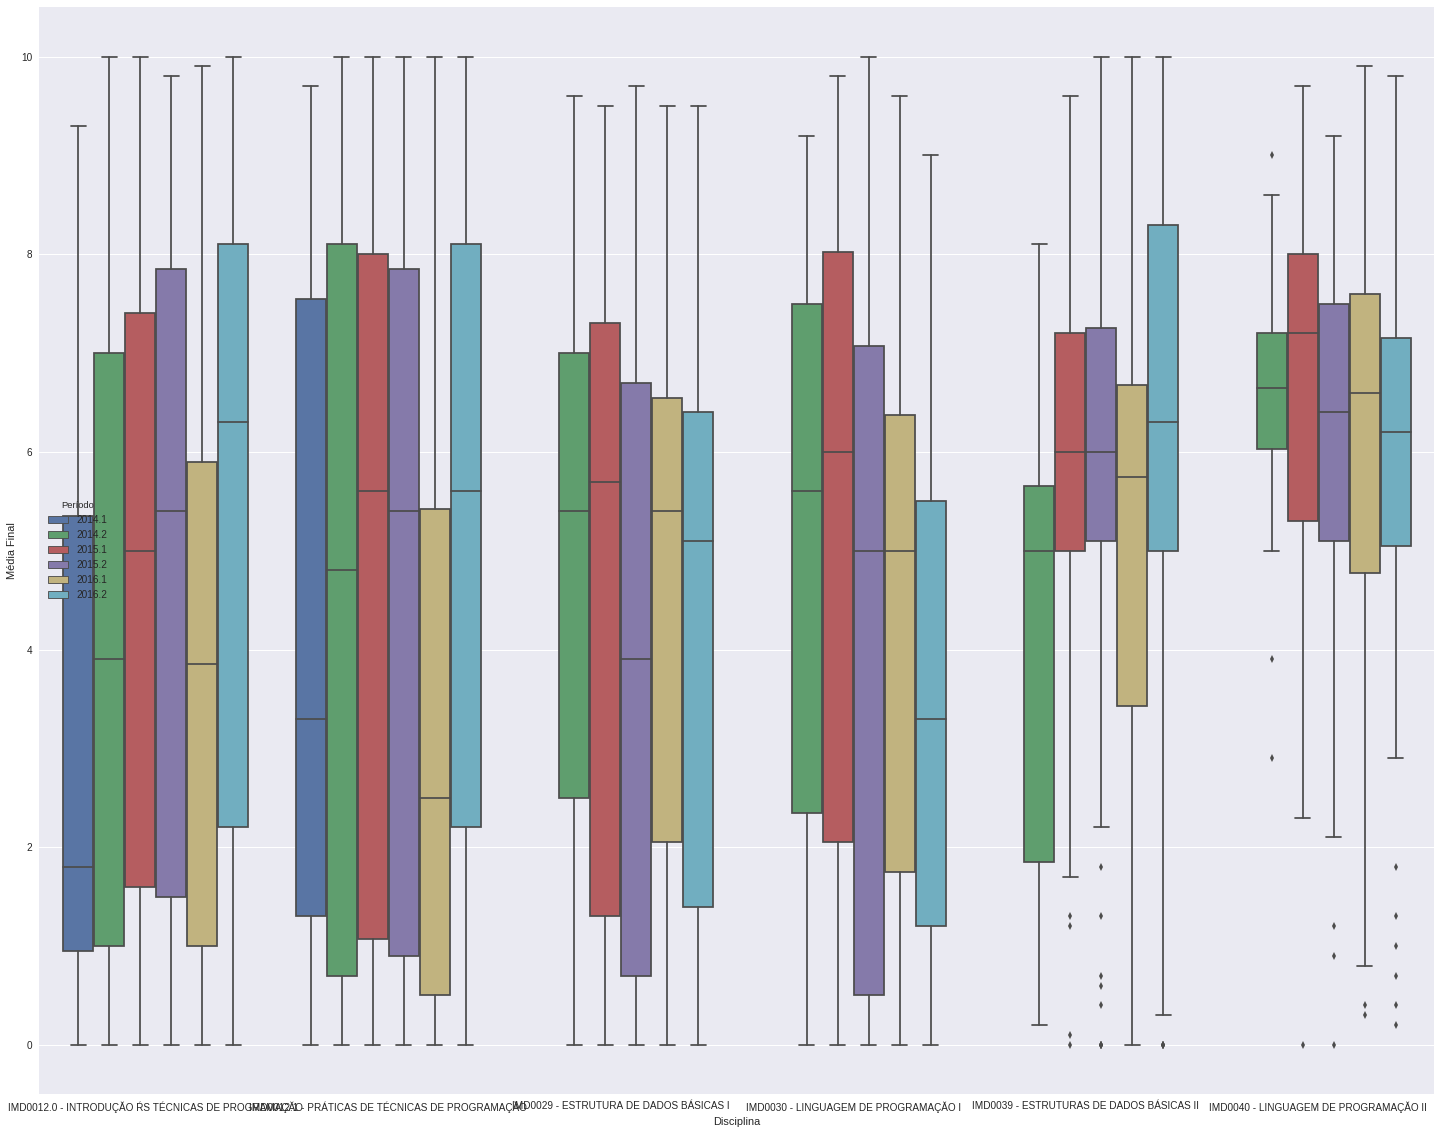

In [14]:
fig, ax  = plt.subplots(figsize=(25,20))
sns.boxplot(x="Disciplina",y="Média Final", hue="Período", data=df1)
plt.show()

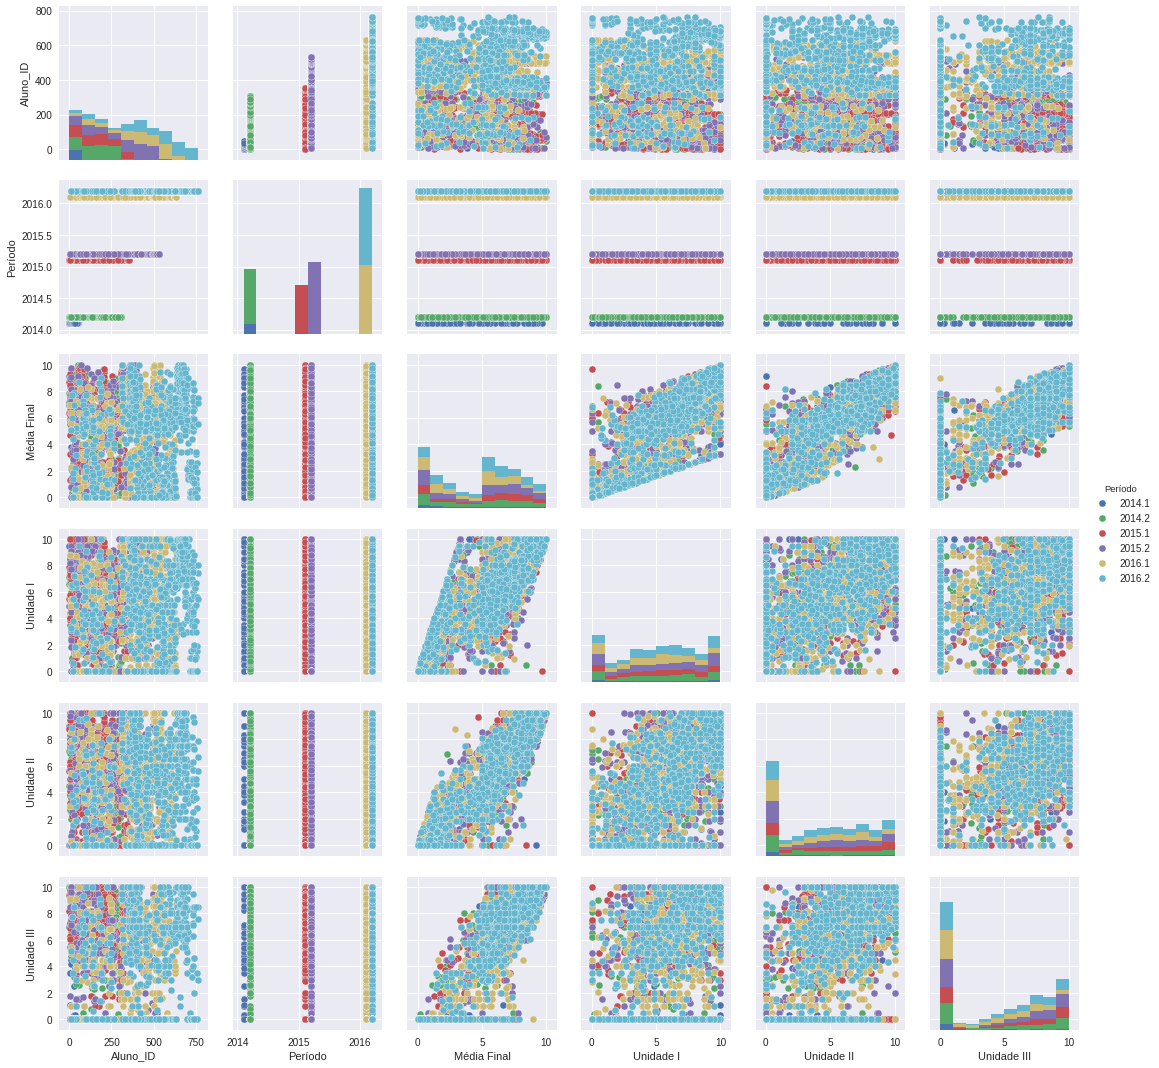

In [15]:
sns.pairplot(df1,hue='Período')

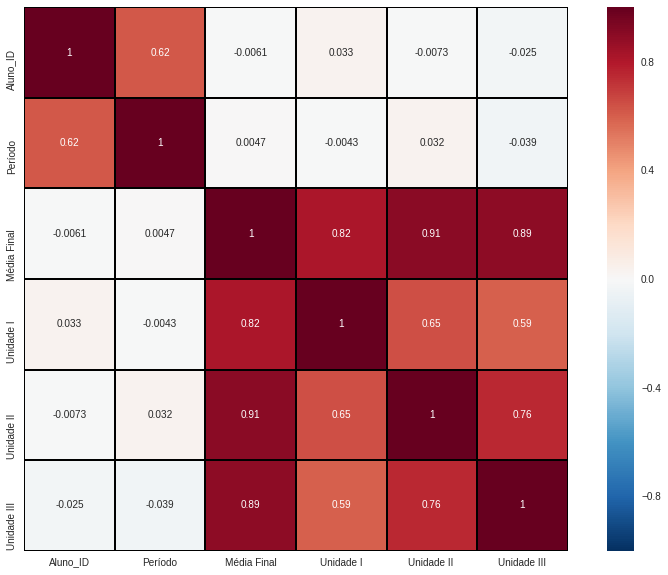

In [16]:
corr = df1.corr()
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr, linewidths=1,vmax=1.0, square=True, linecolor='black', annot=True)